In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import matplotlib as mt
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
Product_Data = pd.read_excel("product-master-bulkpro.xlsx")
Product_Data.head(3)

,Produc_id,Product_category,Product_launch,Product_source,google_search_keyword,product_launch_date,product_launch_time
0,AH737757QD,platinum,2020-01-01 00:00:16,google,sell in bulk online,2020-01-01,00:00:16
1,YR294414SA,sliver,2020-01-01 00:04:56,website,NaN,2020-01-01,00:04:56
2,EA137670JT,platinum,2020-01-01 00:05:29,google,sell in bulk online,2020-01-01,00:05:29


In [3]:
Order_Data = pd.read_excel("order-master-bulkpro.xlsx")
Order_Data.head(3)

,order_id,product_id,order_units,order_date_time,Order_Date,Order_Time
0,ord-1004367,YR294414SA,200,2020-01-01 09:21:58,2020-01-01,09:21:58
1,ord-1004420,UZ216732XH,3000,2020-01-01 13:46:26,2020-01-01,13:46:26
2,ord-1004421,UZ216732XH,3000,2020-01-01 14:18:59,2020-01-01,14:18:59


## Merging the Order & Product data table to get the 360 view of the data, the tables have been merged through "product_id" mentioned in both the data-sets

In [4]:
Complete_data = pd.merge(left = Order_Data,right = Product_Data, left_on="product_id",right_on="Produc_id", how = "left")

In [5]:
Complete_data.head(3)

,order_id,product_id,order_units,order_date_time,Order_Date,Order_Time,Produc_id,Product_category,Product_launch,Product_source,google_search_keyword,product_launch_date,product_launch_time
0,ord-1004367,YR294414SA,200,2020-01-01 09:21:58,2020-01-01,09:21:58,YR294414SA,sliver,2020-01-01 00:04:56,website,NaN,2020-01-01,00:04:56
1,ord-1004420,UZ216732XH,3000,2020-01-01 13:46:26,2020-01-01,13:46:26,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,2020-01-01,12:03:51
2,ord-1004421,UZ216732XH,3000,2020-01-01 14:18:59,2020-01-01,14:18:59,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,2020-01-01,12:03:51


## Segregating the data for "Platinum" Product_category

In [6]:
Complete_data_platinum = Complete_data.loc[Complete_data.Product_category=="platinum"]
Complete_data_platinum.isnull().sum()

order_id                     0
product_id                   0
order_units                  0
order_date_time              0
Order_Date                   0
Order_Time                   0
Produc_id                    0
Product_category             0
Product_launch               0
Product_source               0
google_search_keyword    56000
product_launch_date          0
product_launch_time          0
dtype: int64

### Calculating the overall distribution of source for order listing under Platinum Cateogry, it is obeserved that:
1. 40.57% of the listing comes through website
2. 37.31% of the listing comes through google
3. 11.82% of the listing comes through telesales
4. Facebook, android & whatsapp have a share of 2.13%, 5.68% & 2.18% respectively

                Produc_id
Product_source           
Youtube                28
android               528
facebook              198
google               3467
tele-sales           1098
website              3770
whatsapp              203


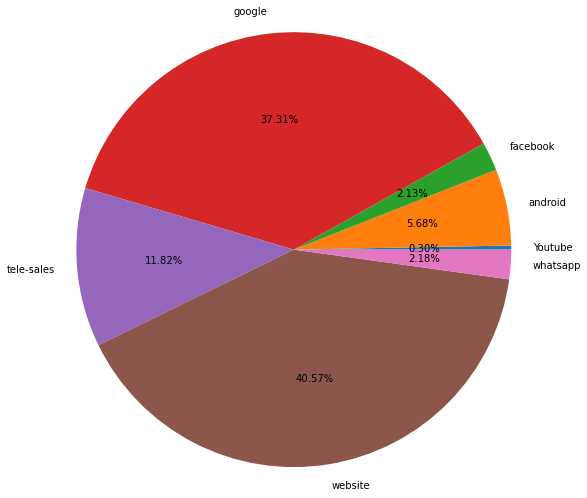

In [7]:
Platinum_sources = Product_Data.loc[(Product_Data.Product_category=="platinum")]
Channel_distribution = Platinum_sources.groupby(by=['Product_source'])[['Produc_id']].count()
print(Channel_distribution)
Channel_distribution.plot(kind = "pie",subplots = True,radius=2.5,autopct = "%.2f%%",legend = False)
plt.ylabel("")
plt.show()

### Adding columns in the dataset
    1. Order_month: Month in which orders were placed
    2. Order_week: Week in which orders were placed
    3. Launch_month: Month in which products were launched
    4. Launch_week: Week in which products were launched

In [8]:
Complete_data_platinum['Order_month'] = Complete_data_platinum.Order_Date.dt.month
Complete_data_platinum['Order_week'] = Complete_data_platinum.Order_Date.dt.week
Complete_data_platinum['launch_month'] = Complete_data_platinum.product_launch_date.dt.month
Complete_data_platinum['launch_week'] = Complete_data_platinum.product_launch_date.dt.week
Complete_data_platinum.head()

,order_id,product_id,order_units,order_date_time,Order_Date,Order_Time,Produc_id,Product_category,Product_launch,Product_source,google_search_keyword,product_launch_date,product_launch_time,Order_month,Order_week,launch_month,launch_week
1,ord-1004420,UZ216732XH,3000,2020-01-01 13:46:26,2020-01-01,13:46:26,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,2020-01-01,12:03:51,1,1,1,1
2,ord-1004421,UZ216732XH,3000,2020-01-01 14:18:59,2020-01-01,14:18:59,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,2020-01-01,12:03:51,1,1,1,1
3,ord-1004422,UZ216732XH,2000,2020-01-01 14:42:19,2020-01-01,14:42:19,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,2020-01-01,12:03:51,1,1,1,1
4,ord-1004423,UZ216732XH,3000,2020-01-01 14:54:17,2020-01-01,14:54:17,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,2020-01-01,12:03:51,1,1,1,1
5,ord-1004424,UZ216732XH,2500,2020-01-01 14:58:18,2020-01-01,14:58:18,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,2020-01-01,12:03:51,1,1,1,1


   Order_month  _order_units
0            1      39876786
1            2      49519423
2            3      34846253
3            4      27659839


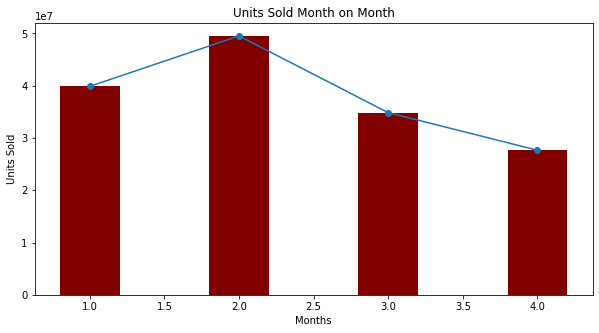

In [9]:
Monthly = Complete_data_platinum.groupby(by = ["Order_month"])[["order_units"]].sum().add_prefix("_").reset_index()
print(Monthly)
Months=Monthly .Order_month
Units = Monthly ._order_units
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Months, Units, color ='maroon',width = 0.4)
plt.xlabel("Months")
plt.ylabel("Units Sold")
plt.title("Units Sold Month on Month")
plt.plot(Months, Units, marker="o")
plt.show()

In [10]:
Complete_data_platinum = Complete_data_platinum.drop(['order_date_time','Product_launch'], axis=1)

### Droping duplicate column "Produc_id"

In [11]:
Complete_data_platinum = Complete_data_platinum.drop(['Produc_id'], axis=1)

### Segmenting Platinum category data further on the basis of source the products were listed:
    1. Tele-sales
    2. Website
    3. Google
    4. Whatsapp
    5. Facebook
    6. Android
    7. Youtube

In [12]:
CDP_Telesales = Complete_data_platinum.loc[Complete_data_platinum.Product_source =='tele-sales']
CDP_Website = Complete_data_platinum.loc[Complete_data_platinum.Product_source =='website']
CDP_Google = Complete_data_platinum.loc[Complete_data_platinum.Product_source =='google']
CDP_Android = Complete_data_platinum.loc[Complete_data_platinum.Product_source =='android']

###  Calculating the total sales of the products done month-on-month which are listed through tele-sales
    Observations for the products listed through "Tele-Sales":
        1. Maximum number of units are ordered in 2nd month, count stands at: 30327451, followed by month 1,3 & 4
        2. Data has been grouped by the sum of units ordered per month

   Order_month  _order_units
0            1      20439770
1            2      30327451
2            3      15721273
3            4      13645473


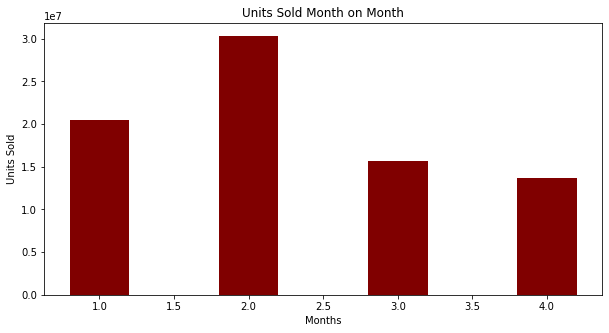

In [13]:
CDP_Telesales.head(4)
Telesales_Monthly = CDP_Telesales.groupby(by = ["Order_month"])[["order_units"]].sum().add_prefix("_").reset_index()
print(Telesales_Monthly)
Months=Telesales_Monthly.Order_month
Units = Telesales_Monthly._order_units
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Months, Units, color ='maroon',width = 0.4)
plt.xlabel("Months")
plt.ylabel("Units Sold")
plt.title("Units Sold Month on Month")
plt.show()

### Calculating the total numbers of units orderd day wise for product listed through "Tele-Sales" 
    Data has been grouped by the sum of units ordered and date of order
#### Trend has been observed that Large orders for products listed through Tele-Sales are placed during the 1st week on the month or last week of the month
    
    1. Top 10 dates when maximum units were ordered are:
        2020-02-06	3070992
        2020-02-23	2243207
        2020-02-07	2219271
        2020-02-08	1952630
        2020-02-09	1951309
        2020-03-25	1944865
        2020-01-24	1690110
        2020-02-24	1505374
        2020-01-07	1502442
        2020-01-09	1404061

    Order_Date  _order_units
0   2020-01-01         44785
1   2020-01-02        456882
2   2020-01-03        524439
3   2020-01-04        208564
4   2020-01-05        378838
..         ...           ...
116 2020-04-26        489501
117 2020-04-27        134475
118 2020-04-28         97855
119 2020-04-29       1297787
120 2020-04-30        289910

[121 rows x 2 columns]


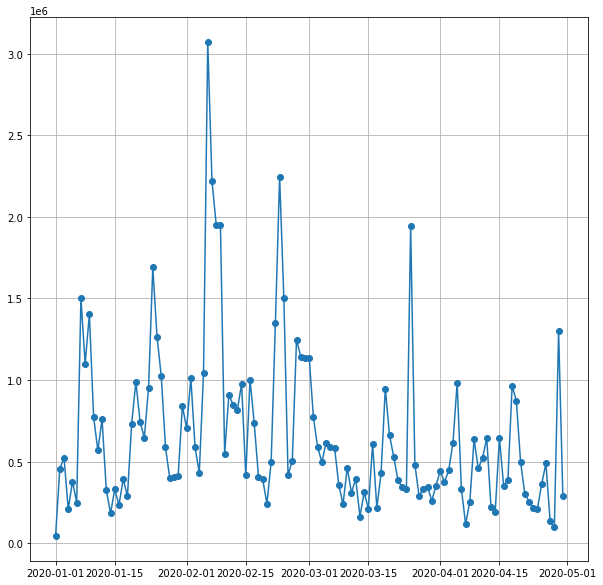

In [14]:
Telesales_Daily = CDP_Telesales.groupby(by = ["Order_Date"])[["order_units"]].sum().add_prefix("_").reset_index()
date = Telesales_Daily.Order_Date
Units_T = Telesales_Daily._order_units
print(Telesales_Daily)
plt.figure(figsize=(10,10))
plt.plot(date,Units_T, marker="o")
plt.grid(True)
plt.show()

In [15]:
Top_10_dates = Telesales_Daily.sort_values(by = "_order_units", ascending=False).head(10)
Top_10_dates

,Order_Date,_order_units
36,2020-02-06,3070992
53,2020-02-23,2243207
37,2020-02-07,2219271
38,2020-02-08,1952630
39,2020-02-09,1951309
84,2020-03-25,1944865
23,2020-01-24,1690110
54,2020-02-24,1505374
6,2020-01-07,1502442
8,2020-01-09,1404061


### Average Daily order quantity per product
    Data has been grouped by average of units ordered, order date & prodcut id
    Products with the highest average for daily quantity orders are (descending order):
        EI162034CU	
        WN443620OY	
        LJ509114EJ	
        QY129990KD	
        HC987240QR	
        OG963162VS	
        LC495325PQ	
        YX157955CA	
        LO979266CN	
        GC293697UN	

In [16]:
Telesales_Daily_PP = CDP_Telesales.groupby(by = ["product_id","Order_Date"])[["order_units"]].mean().add_prefix("Average_")
Telesales_Daily_PP = Telesales_Daily_PP.sort_values(by = ['Order_Date'], ascending=True)
Telesales_Daily_PP.to_excel("test.xlsx")
Telesales_Daily_PP

,,Average_order_units
product_id,Order_Date,
UZ216732XH,2020-01-01,2621.363636
VC239210ZM,2020-01-01,693.478261
OG706857KB,2020-01-02,1301.724138
PP682660AQ,2020-01-02,1050.000000
VC239210ZM,2020-01-02,978.571429
...,...,...
PP838822JY,2020-04-30,8211.666667
HC987240QR,2020-04-30,5583.333333
WC456287KN,2020-04-30,7106.250000


In [17]:
Telesales_Daily_PP_1 = CDP_Telesales.groupby(by = ["product_id"])[["order_units"]].mean().add_prefix("Average_")
Telesales_Daily_PP_1.sort_values(by = "Average_order_units", ascending= False).head(10)

,Average_order_units
product_id,
EI162034CU,250500.000000
WN443620OY,22750.500000
LJ509114EJ,20000.000000
QY129990KD,18276.923077
HC987240QR,15919.437500
OG963162VS,15025.590000
LC495325PQ,10562.500000
YX157955CA,10346.296296
LO979266CN,10207.166667


In [18]:
Product_Data['launch_month'] = Product_Data.product_launch_date.dt.month
Product_Data['launch_week'] = Product_Data.product_launch_date.dt.week
Product_Data.head()

,Produc_id,Product_category,Product_launch,Product_source,google_search_keyword,product_launch_date,product_launch_time,launch_month,launch_week
0,AH737757QD,platinum,2020-01-01 00:00:16,google,sell in bulk online,2020-01-01,00:00:16,1,1
1,YR294414SA,sliver,2020-01-01 00:04:56,website,NaN,2020-01-01,00:04:56,1,1
2,EA137670JT,platinum,2020-01-01 00:05:29,google,sell in bulk online,2020-01-01,00:05:29,1,1
3,GD677868SD,platinum,2020-01-01 00:32:19,google,sell on flipkart,2020-01-01,00:32:19,1,1
4,TJ988922PQ,platinum,2020-01-01 05:19:12,website,NaN,2020-01-01,05:19:12,1,1


### Number of new products onboared daily  weekly & monthly through Tele-Sales
    1. Total of 1098 products were launched through Tele-Sales
    2. on date 27-02-2020 maximum of 21 products were added through this channel
    3. On average 10 prodcuts are added daily through tele-sales over the website
    4. Week 13 had the most number of products added i.e 85 & week 18 had the addition of 15 products only
    5. 2nd Month had the maxium addition of 283 products through tele-sales,followed by 3rd, 4th & 1st months. 

1098
9.803571428571429


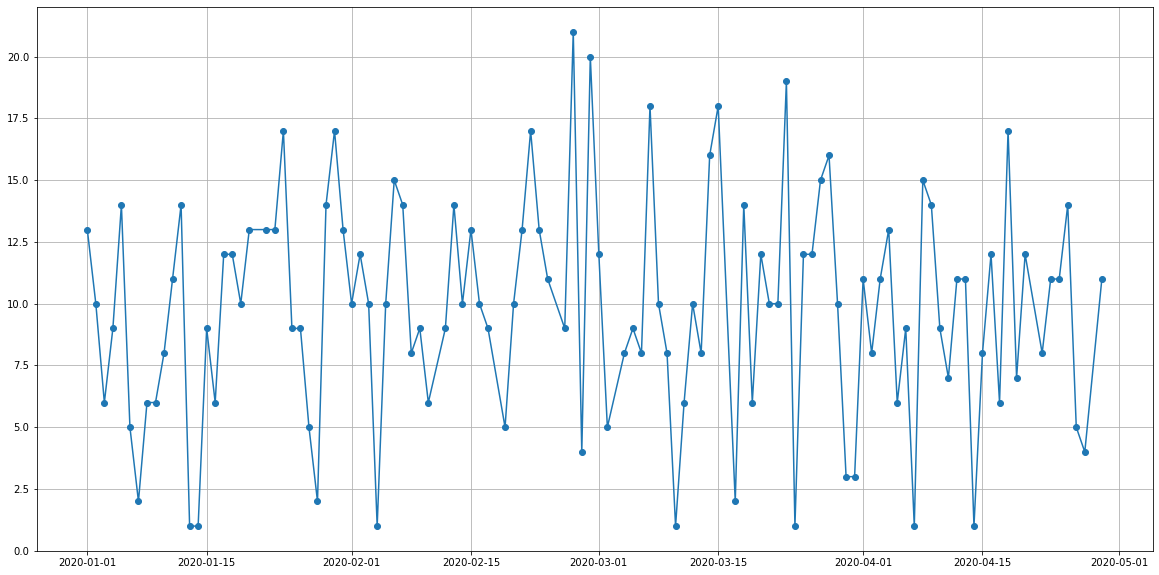

,product_launch_date,_Produc_id
53,2020-02-27,21
55,2020-02-29,20
76,2020-03-23,19
69,2020-03-15,18
61,2020-03-07,18
49,2020-02-22,17
28,2020-01-30,17
102,2020-04-18,17
22,2020-01-24,17
68,2020-03-14,16


In [19]:
Product_Data_tele = Product_Data.loc[(Product_Data.Product_source=="tele-sales") & (Product_Data.Product_category=="platinum")]
Product_Data_tele
Telesales_Daily_launch = Product_Data_tele.groupby(by = ["product_launch_date"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Telesales_Daily_launch._Produc_id.sum())
print(Telesales_Daily_launch._Produc_id.mean())

T_Launch_date= Telesales_Daily_launch.product_launch_date
T_Count = Telesales_Daily_launch._Produc_id

plt.figure(figsize = (20, 10))
plt.plot(T_Launch_date,T_Count, marker="o")
plt.grid(True)
plt.show()

Telesales_Daily_launch = Product_Data_tele.groupby(by = ["product_launch_date"])[["Produc_id"]].count().add_prefix("_").reset_index()
Telesales_Daily_launch.sort_values(by='_Produc_id',ascending=False).head(10)

    launch_week  _Produc_id
0             1          52
1             2          52
2             3          51
3             4          74
4             5          73
5             6          67
6             7          62
7             8          67
8             9          77
9            10          58
10           11          67
11           12          54
12           13          85
13           14          55
14           15          66
15           16          62
16           17          61
17           18          15


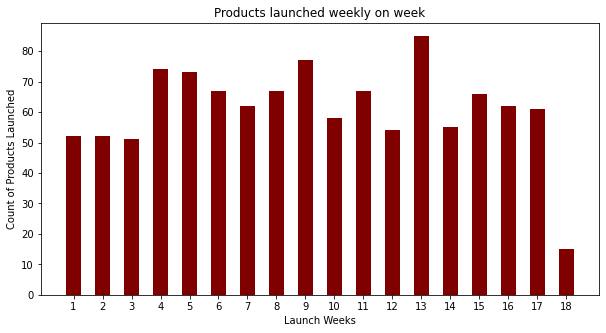

In [20]:
Telesales_weekly_launch = Product_Data_tele.groupby(by = ["launch_week"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Telesales_weekly_launch)
T_Launch_week = Telesales_weekly_launch.launch_week
T_Product_id = Telesales_weekly_launch._Produc_id
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(T_Launch_week, T_Product_id, color ='maroon',width = 0.5)
plt.xlabel("Launch Weeks")
plt.ylabel("Count of Products Launched")
plt.title("Products launched weekly on week")
plt.xticks(np.arange(min(T_Launch_week), max(T_Launch_week)+1, 1.0))
plt.show()

   launch_month  _Produc_id
0             1         280
1             2         283
2             3         282
3             4         253


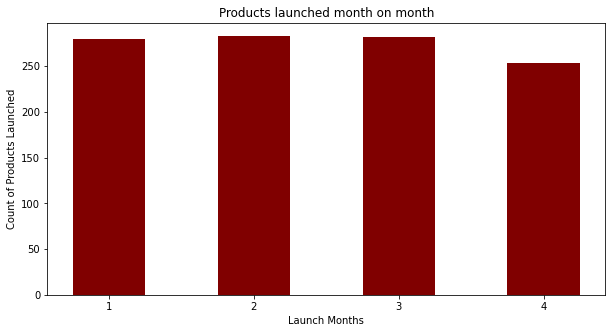

In [21]:
Telesales_monthly_launch = Product_Data_tele.groupby(by = ["launch_month"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Telesales_monthly_launch)
T_monthly_launch = Telesales_monthly_launch.launch_month
T_monthly_count = Telesales_monthly_launch._Produc_id
fig,ax = plt.subplots(figsize = (10, 5))
 
# creating the bar plot
plt.bar(T_monthly_launch, T_monthly_count, color ='maroon',width = 0.5)
plt.xlabel("Launch Months")
plt.ylabel("Count of Products Launched")
plt.title("Products launched month on month")
plt.xticks(np.arange(min(T_monthly_launch), max(T_monthly_launch)+1, 1.0))

plt.show()

### Calcuting sales of new products sold month on month 
    1. Total count of products listed through Tele-sales are 1098 and only 526 have been ordered since they have been launched, therefore the conversion rate is 48%.
    2. This has been observed that products are sold more in the months they are introduced and it reduces in the following months, out of 526 only 151 products have been re-orded in the different months & 375 have not been ordered other then the month in which they were launched.
    %age of products not-repeated which were launched: 71% drop in retention
    3. Top 3 products who has perfomed the best after the launch are: 'JS705494JI, FO304915IU, BZ447462MW'
    4. Total units ordered which are channeled through tele-sales is: 80133967

In [22]:
CDP_Telesales.head()

,order_id,product_id,order_units,Order_Date,Order_Time,Product_category,Product_source,google_search_keyword,product_launch_date,product_launch_time,Order_month,Order_week,launch_month,launch_week
1,ord-1004420,UZ216732XH,3000,2020-01-01,13:46:26,platinum,tele-sales,NaN,2020-01-01,12:03:51,1,1,1,1
2,ord-1004421,UZ216732XH,3000,2020-01-01,14:18:59,platinum,tele-sales,NaN,2020-01-01,12:03:51,1,1,1,1
3,ord-1004422,UZ216732XH,2000,2020-01-01,14:42:19,platinum,tele-sales,NaN,2020-01-01,12:03:51,1,1,1,1
4,ord-1004423,UZ216732XH,3000,2020-01-01,14:54:17,platinum,tele-sales,NaN,2020-01-01,12:03:51,1,1,1,1
5,ord-1004424,UZ216732XH,2500,2020-01-01,14:58:18,platinum,tele-sales,NaN,2020-01-01,12:03:51,1,1,1,1


In [23]:
New_Product_Sold = CDP_Telesales.groupby(by=['product_id','launch_month','Order_month'])[['order_units']].sum()
New_Product_Sold = New_Product_Sold.sort_values(by=["launch_month","order_units"], ascending=True)
New_Product_Sold.to_excel("Tele-Sales-Order.xlsx")
New_Product_Sold

,,,order_units
product_id,launch_month,Order_month,
BY239891DG,1,1,100
JP796481LM,1,3,100
AZ329410JT,1,3,150
BX908616WT,1,3,150
JP796481LM,1,1,151
...,...,...,...
QY919278NZ,4,4,492252
EI162034CU,4,4,501000
GA873429LZ,4,4,522330


### Calculating the total sales of the products done month-on-month which are listed through Website
Observations for the products listed through "Website":
  1. Maximum number of units are ordered in 1st month, count stands at: 12171992, followed by month 3rd,2nd & 4th
  2. Data has been grouped by the sum of units ordered per month

   Order_month  _order_units
0            1      12171992
1            2      10782617
2            3      11252224
3            4       7993733


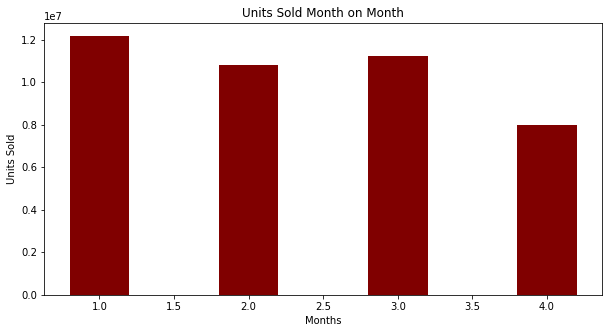

In [24]:
CDP_Website
Website_Monthly = CDP_Website.groupby(by = ["Order_month"])[["order_units"]].sum().add_prefix("_").reset_index()
print(Website_Monthly)
Months=Website_Monthly.Order_month
Units = Website_Monthly._order_units
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Months, Units, color ='maroon',width = 0.4)
plt.xlabel("Months")
plt.ylabel("Units Sold")
plt.title("Units Sold Month on Month")
plt.show()

### Calculating the total numbers of units orderd day wise for product listed through "Website"
Data has been grouped by the sum of units ordered and date of order
#### Trend has been observed that Large orders for products listed through Website are usually place in the 2nd or 3rd week of the months
1. Top 10 dates when maximum units were ordered are:
       2020-04-29	2202766
       2020-01-12	1763226
       2020-03-21	1655763
       2020-02-08	1643254
       2020-02-15	1047278
       2020-03-14	864191
       2020-01-13	807147
       2020-01-11	802279
       2020-03-22	796300
       2020-03-23	640929

    Order_Date  _order_units
0   2020-01-01        117676
1   2020-01-02        176878
2   2020-01-03        330155
3   2020-01-04        374986
4   2020-01-05        202376
..         ...           ...
116 2020-04-26        144139
117 2020-04-27        233022
118 2020-04-28        302922
119 2020-04-29       2202766
120 2020-04-30         79900

[121 rows x 2 columns]


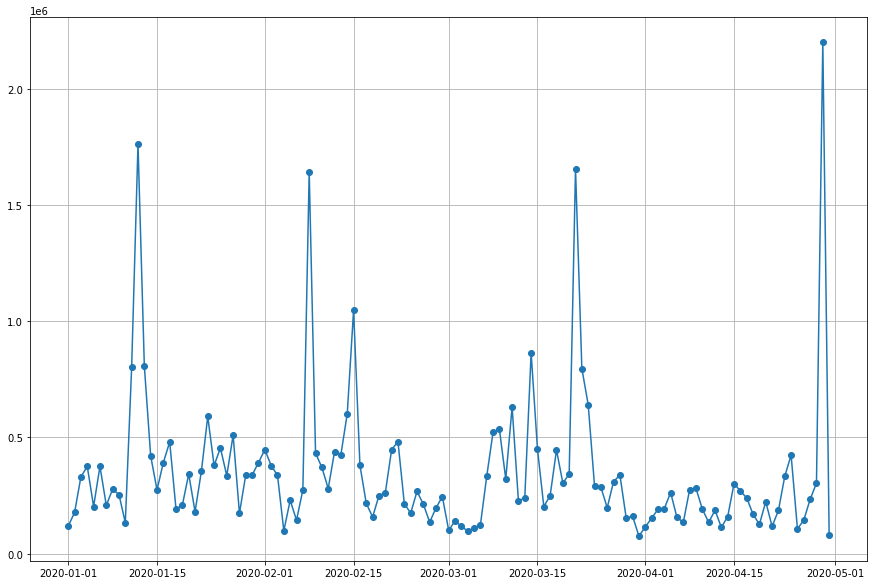

In [25]:
Website_Daily = CDP_Website.groupby(by = ["Order_Date"])[["order_units"]].sum().add_prefix("_").reset_index()
print(Website_Daily)
W_date = Website_Daily.Order_Date
W_Units = Website_Daily._order_units
plt.figure(figsize=(15,10))
plt.plot(W_date,W_Units, marker="o")
plt.grid(True)
plt.show()

In [26]:
Top_10_dates = Website_Daily.sort_values(by = "_order_units", ascending=False).head(10)
Top_10_dates

,Order_Date,_order_units
119,2020-04-29,2202766
11,2020-01-12,1763226
80,2020-03-21,1655763
38,2020-02-08,1643254
45,2020-02-15,1047278
73,2020-03-14,864191
12,2020-01-13,807147
10,2020-01-11,802279
81,2020-03-22,796300
82,2020-03-23,640929


### Average Daily order quantity per product
    Data has been grouped by average of units ordered, order date & prodcut id
    1. Products with the highest average for daily quantity orders are (descending order):
        NZ324899WZ
        KC436776SR	
        AV452896DQ	
        YA628565OV	
        QE482751HO	
        DW145135KU	
        KC436776SR	
        VM478088WN	
        GI385465TK	
        ZU298515YB

In [27]:
Website_Daily_PP = CDP_Website.groupby(by = ["product_id","Order_Date"])[["order_units"]].mean().add_prefix("_")
Website_Daily_PP.to_excel("Website.xlsx")
Website_Daily_PP.sort_values(by = ['_order_units'], ascending=False).head(10)

,,_order_units
product_id,Order_Date,
NZ324899WZ,2020-04-29,300000.0
KC436776SR,2020-01-27,121000.0
AV452896DQ,2020-04-24,104550.0
YA628565OV,2020-02-01,52425.0
QE482751HO,2020-02-15,51500.0
DW145135KU,2020-03-06,49000.0
KC436776SR,2020-02-08,38812.5
VM478088WN,2020-02-21,36250.0
GI385465TK,2020-02-17,36250.0


### Number of new products onboared daily, weekly & monthly through Website
    1. Total of 3770 products were launched through Website
    2. on date 2020-03-23 maximum of 66 products were added through this channel
    3. On average 31 prodcuts are added daily through tele-sales over the website
    4. Week 15 had the most number of products added i.e 289 & week 1 had the addition of 136 products only
    5. 4th Month had the maxium addition of 1153 products through website,followed by 3rd, 1st & 2nd months. 

    product_launch_date  _Produc_id
0            2020-01-01          25
1            2020-01-02          20
2            2020-01-03          30
3            2020-01-04          21
4            2020-01-05          40
..                  ...         ...
116          2020-04-26          30
117          2020-04-27          36
118          2020-04-28          37
119          2020-04-29          43
120          2020-04-30          29

[121 rows x 2 columns]
3770
31.15702479338843


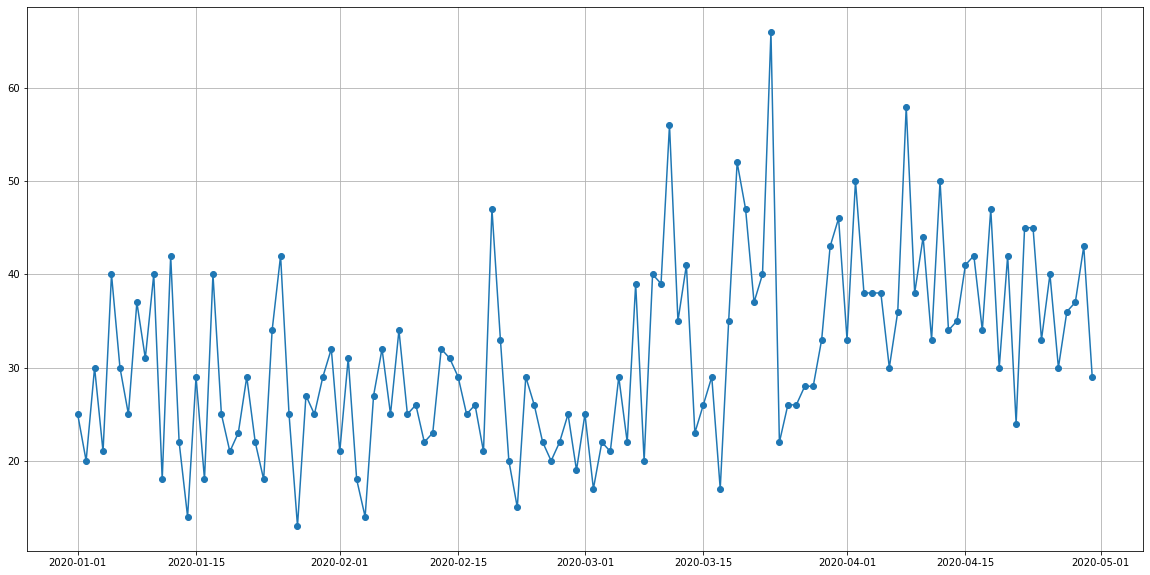

,product_launch_date,_Produc_id
82,2020-03-23,66
98,2020-04-08,58
70,2020-03-11,56
78,2020-03-19,52
92,2020-04-02,50
102,2020-04-12,50
49,2020-02-19,47
79,2020-03-20,47
108,2020-04-18,47
90,2020-03-31,46


In [28]:
Product_Data_website = Product_Data.loc[(Product_Data.Product_source=="website") & (Product_Data.Product_category=="platinum")]
Product_Data_website
Website_Daily_launch = Product_Data_website.groupby(by = ["product_launch_date"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Website_Daily_launch)
print(Website_Daily_launch._Produc_id.sum())
print(Website_Daily_launch._Produc_id.mean())
W_Launch_date= Website_Daily_launch.product_launch_date
W_Count = Website_Daily_launch._Produc_id

plt.figure(figsize = (20, 10))
plt.plot(W_Launch_date,W_Count, marker="o")
plt.grid(True)
plt.show()

Website_Daily_launch = Product_Data_website.groupby(by = ["product_launch_date"])[["Produc_id"]].count().add_prefix("_").reset_index()
Website_Daily_launch.sort_values(by='_Produc_id',ascending=False).head(10)


    launch_week  _Produc_id
0             1         136
1             2         223
2             3         169
3             4         193
4             5         178
5             6         175
6             7         188
7             8         191
8             9         159
9            10         170
10           11         260
11           12         257
12           13         229
13           14         286
14           15         289
15           16         263
16           17         259
17           18         145


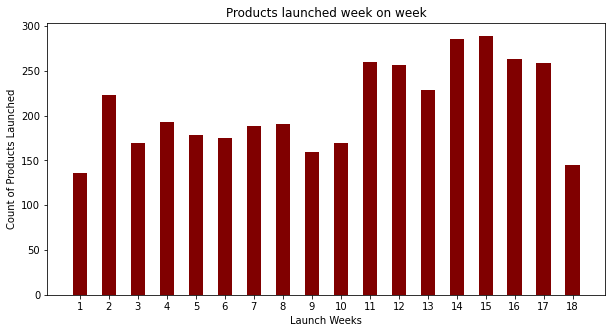

In [29]:
Website_weekly_launch = Product_Data_website.groupby(by = ["launch_week"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Website_weekly_launch)
W_Launch_week = Website_weekly_launch.launch_week
W_Product_id = Website_weekly_launch._Produc_id
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(W_Launch_week, W_Product_id, color ='maroon',width = 0.5)
plt.xlabel("Launch Weeks")
plt.ylabel("Count of Products Launched")
plt.title("Products launched week on week")
plt.xticks(np.arange(min(W_Launch_week), max(W_Launch_week)+1, 1.0))
plt.show()

   launch_month  _Produc_id
0             1         847
1             2         740
2             3        1030
3             4        1153


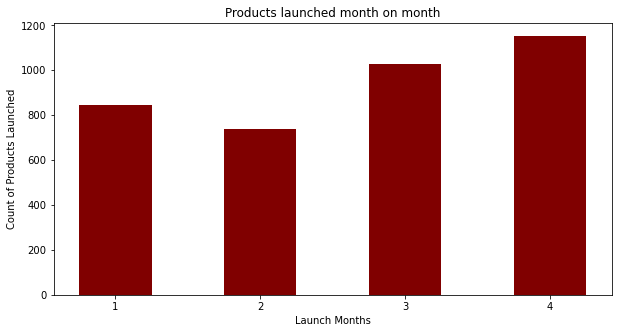

In [30]:
Website_monthly_launch = Product_Data_website.groupby(by = ["launch_month"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Website_monthly_launch)
W_monthly_launch = Website_monthly_launch.launch_month
W_monthly_count = Website_monthly_launch._Produc_id
fig,ax = plt.subplots(figsize = (10, 5))
 
# creating the bar plot
plt.bar(W_monthly_launch, W_monthly_count, color ='maroon',width = 0.5)
plt.xlabel("Launch Months")
plt.ylabel("Count of Products Launched")
plt.title("Products launched month on month")
plt.xticks(np.arange(min(W_monthly_launch), max(W_monthly_launch)+1, 1.0))

plt.show()

### Calcuting sales of new products sold month on month 
1. Total count of products listed through Websites are 3077 and only 486 have been ordered since they have been launched, therefore the conversion rate is 16%.
2. This has been observed that products are sold more in the months they are introduced and it reduces in the following months, out of 486 only 100 products have been re-orded in the different months & 386 have not been ordered other then the month in which they were launched.
%age of products not-repeated which were launched: 79% drop in retention
3. Top 3 products who has perfomed the best after the launch are: KC436776SR, NR528159TO, NZ324899WZ
4. Total units ordered which are introduced through Website are: 42200566

In [31]:
Website_sold = CDP_Website.groupby(by=['product_id','launch_month','Order_month'])[['order_units']].sum()
Website_sold = Website_sold.sort_values(by=['launch_month','order_units'], ascending=True)
Website_sold.to_excel("Website_sold.xlsx")
Website_sold

,,,order_units
product_id,launch_month,Order_month,
SM818193EC,1,1,100
US658449BV,1,1,100
DF502328WO,1,1,200
EC658642EI,1,1,200
LL599530XR,1,1,200
...,...,...,...
LX142750XD,4,4,236401
WI653937ZV,4,4,251008
YK955422VH,4,4,318760


### Calculating the total sales of the products done month-on-month which are listed through Google
Observations for the products listed through "Google":

Maximum number of units are ordered in 2nd month, count stands at: 7284548, followed by month 3rd,4th & 1st
Data has been grouped by the sum of units ordered per month

   Order_month  _order_units
0            1       3378420
1            2       7284548
2            3       6574407
3            4       4494404


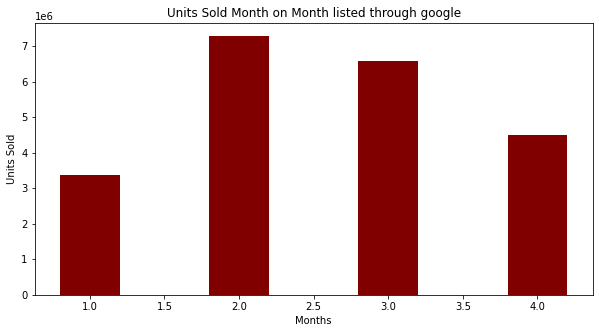

In [32]:
CDP_Google
Google_Monthly = CDP_Google.groupby(by = ["Order_month"])[["order_units"]].sum().add_prefix("_").reset_index()
print(Google_Monthly)
GMonths=Google_Monthly.Order_month
GUnits = Google_Monthly._order_units
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(GMonths, GUnits, color ='maroon',width = 0.4)
plt.xlabel("Months")
plt.ylabel("Units Sold")
plt.title("Units Sold Month on Month listed through google")
plt.show()

### Calculating the total numbers of units orderd day wise for product listed through "Google
Data has been grouped by the sum of units ordered and date of order
#### Trend has been observed that Large orders are placed during 3rd & 4th week of the month
    Top 10 dates when maximum units were ordered are:
        2020-02-19	933334
        2020-03-19	878628
        2020-02-20	696430
        2020-02-21	660858
        2020-04-24	469828
        2020-02-18	443418
        2020-02-05	428503
        2020-02-23	371776
        2020-03-25	370420
        2020-03-06	333931


    Order_Date  _order_units
0   2020-01-01           200
1   2020-01-02          3200
2   2020-01-03         18825
3   2020-01-04          8901
4   2020-01-05         20176
..         ...           ...
116 2020-04-26        128250
117 2020-04-27         81633
118 2020-04-28         53280
119 2020-04-29         27450
120 2020-04-30         52060

[121 rows x 2 columns]


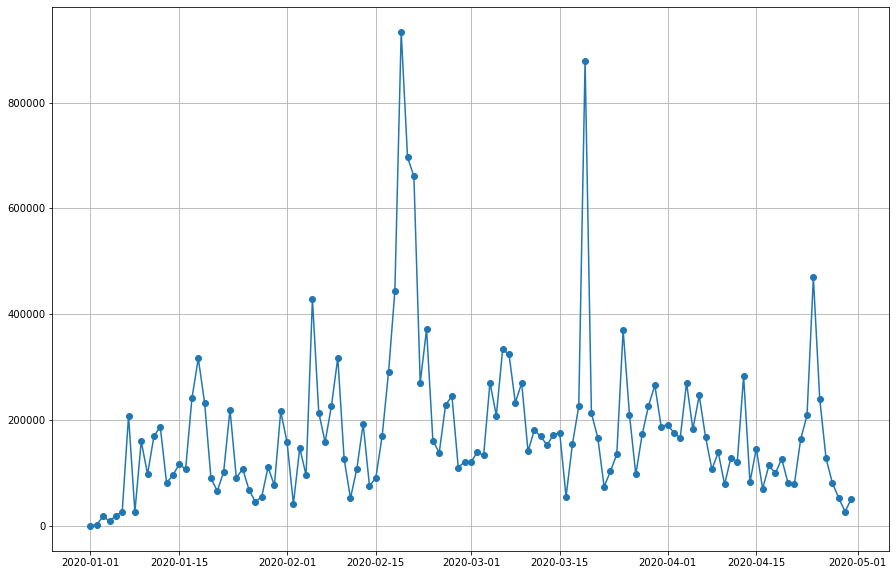

In [33]:
Google_Daily = CDP_Google.groupby(by = ["Order_Date"])[["order_units"]].sum().add_prefix("_").reset_index()
print(Google_Daily)
Gdate = Google_Daily.Order_Date
GUnits = Google_Daily._order_units

plt.figure(figsize=(15,10))
plt.plot(Gdate,GUnits, marker="o")
plt.grid(True)
plt.show()

In [34]:
Top_10_dates = Google_Daily.sort_values(by = "_order_units", ascending=False).head(10)
Top_10_dates

,Order_Date,_order_units
49,2020-02-19,933334
78,2020-03-19,878628
50,2020-02-20,696430
51,2020-02-21,660858
114,2020-04-24,469828
48,2020-02-18,443418
35,2020-02-05,428503
53,2020-02-23,371776
84,2020-03-25,370420
65,2020-03-06,333931


# Average Daily order quantity per product
Data has been grouped by average of units ordered, order date & prodcut id
1. Products with the highest average for daily quantity orders are (descending order):
        NT159477DY
        UY508390IG
        HJ724995HF
        HD584668XL
        HD947120XS
        MX756814NA
        IK953386RE
        ID785825NW
        LA413226VO
        HD584668XL

In [35]:
Google_Daily_PP = CDP_Google.groupby(by = ["product_id","Order_Date"])[["order_units"]].mean().add_prefix("_")
Google_Daily_PP.to_excel("Google.xlsx")
Google_Daily_PP.sort_values(by = ['_order_units'], ascending=False).head(10)

,,_order_units
product_id,Order_Date,
NT159477DY,2020-02-13,50362.50
UY508390IG,2020-01-07,34240.00
HJ724995HF,2020-03-04,26328.25
HD584668XL,2020-02-17,25000.00
HD947120XS,2020-03-17,21750.00
MX756814NA,2020-04-11,21000.00
IK953386RE,2020-02-13,20000.00
ID785825NW,2020-02-22,20000.00
LA413226VO,2020-03-23,18500.00


### Number of new products onboared daily, weekly & monthly through Google
1. Total of 3467 products were launched through google
2. on date 2020-03-09 maximum of 54 products were added through this channel
3. On average 29 prodcuts are added daily through google over the website
4. Week 15 had the most number of products added i.e 254 & week 18 had the addition of 94 products only
5. 4th Month had the maxium addition of 956 products through google,followed by 3rd, 2nd & 1st months. 

    product_launch_date  _Produc_id
0            2020-01-01          20
1            2020-01-02          47
2            2020-01-03          28
3            2020-01-04          27
4            2020-01-05          27
..                  ...         ...
115          2020-04-25          37
116          2020-04-26          27
117          2020-04-27          31
118          2020-04-28          30
119          2020-04-29          33

[120 rows x 2 columns]
3467
28.891666666666666


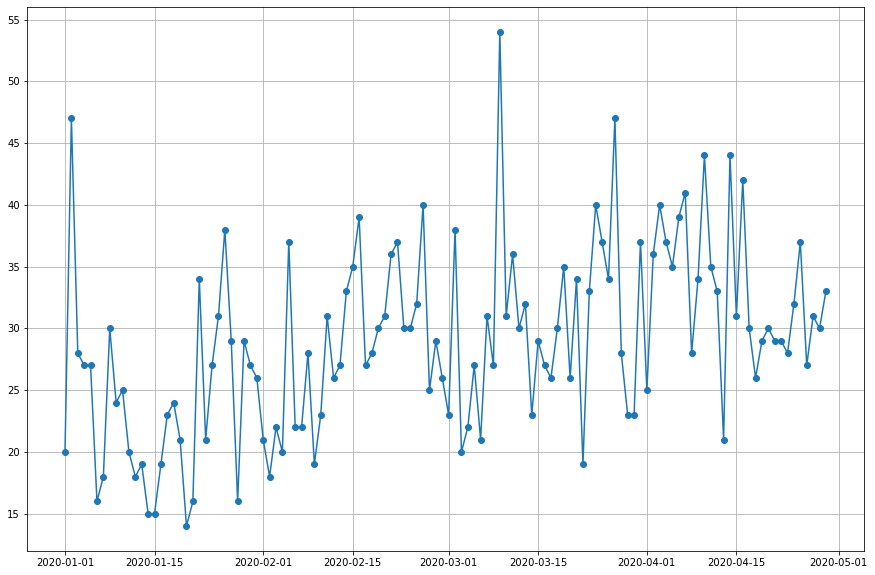

,product_launch_date,_Produc_id
68,2020-03-09,54
86,2020-03-27,47
1,2020-01-02,47
104,2020-04-14,44
100,2020-04-10,44
106,2020-04-16,42
97,2020-04-07,41
93,2020-04-03,40
83,2020-03-24,40
56,2020-02-26,40


In [36]:
Product_Data_google = Product_Data.loc[(Product_Data.Product_source=="google")& (Product_Data.Product_category=="platinum")]
Product_Data_google
Google_Daily_launch = Product_Data_google.groupby(by = ["product_launch_date"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Google_Daily_launch)
print(Google_Daily_launch._Produc_id.sum())
print(Google_Daily_launch._Produc_id.mean())
G_Launch_date= Google_Daily_launch.product_launch_date
G_Count = Google_Daily_launch._Produc_id

plt.figure(figsize=(15,10))
plt.plot(G_Launch_date,G_Count, marker="o")
plt.grid(True)
plt.show()


Google_Daily_launch = Product_Data_google.groupby(by = ["product_launch_date"])[["Produc_id"]].count().add_prefix("_").reset_index()
Google_Daily_launch.sort_values(by='_Produc_id',ascending=False).head(10)

    launch_week  _Produc_id
0             1         149
1             2         151
2             3         136
3             4         181
4             5         166
5             6         170
6             7         214
7             8         219
8             9         205
9            10         186
10           11         235
11           12         197
12           13         242
13           14         233
14           15         254
15           16         223
16           17         212
17           18          94


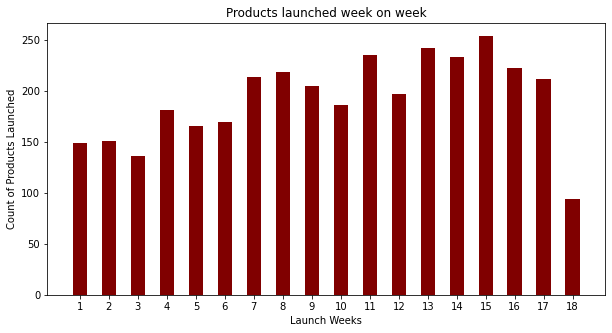

In [37]:
Google_weekly_launch = Product_Data_google.groupby(by = ["launch_week"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Google_weekly_launch)
G_Launch_week = Google_weekly_launch.launch_week
G_Product_id = Google_weekly_launch._Produc_id
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(G_Launch_week, G_Product_id, color ='maroon',width = 0.5)
plt.xlabel("Launch Weeks")
plt.ylabel("Count of Products Launched")
plt.title("Products launched week on week")
plt.xticks(np.arange(min(W_Launch_week), max(W_Launch_week)+1, 1.0))
plt.show()

   launch_month  _Produc_id
0             1         744
1             2         824
2             3         943
3             4         956


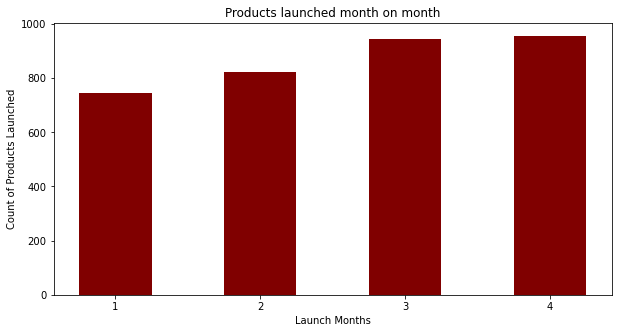

In [38]:
Google_monthly_launch = Product_Data_google.groupby(by = ["launch_month"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Google_monthly_launch)
G_monthly_launch = Google_monthly_launch.launch_month
G_monthly_count = Google_monthly_launch._Produc_id
fig,ax = plt.subplots(figsize = (10, 5))
 
# creating the bar plot
plt.bar(G_monthly_launch, G_monthly_count, color ='maroon',width = 0.5)
plt.xlabel("Launch Months")
plt.ylabel("Count of Products Launched")
plt.title("Products launched month on month")
plt.xticks(np.arange(min(G_monthly_launch), max(G_monthly_launch)+1, 1.0))

plt.show()

### Calcuting sales of new products sold month on month
1. Total count of products listed through Websites are 3467 and only 265 have been ordered since they have been launched, therefore the conversion rate is 7.64%.
2. This has been observed that products are sold more in the months they are introduced and it reduces in the following months, out of 340 only 75 products have been re-orded in the different months & 265 have not been ordered other then the month in which they were launched. %age of products not-repeated which were launched: 78% drop in retention
3. Top 3 products who has perfomed the best after the launch are: HJ724995HF, LO641897NG, RW817578EA
4. Total units ordered which are introduced through google are: 21731779

In [39]:
Google_sold = CDP_Google.groupby(by=['product_id','launch_month','Order_month'])[['order_units']].sum()
Google_sold = Google_sold.sort_values(by=['launch_month','order_units'], ascending=True)
Google_sold.to_excel("Google_sold.xlsx")
Google_sold

,,,order_units
product_id,launch_month,Order_month,
MF374342KV,1,3,100
FK134086IZ,1,1,150
AH191080XG,1,1,200
EJ268452EC,1,2,200
KQ269697PJ,1,2,200
...,...,...,...
UD846873WD,4,4,149648
ZB914718RB,4,4,152452
WT539887JB,4,4,164381


### Calculating the total sales of the products done month-on-month which are listed through android
Observations for the products listed through "Andorid":

1. Maximum number of units are ordered in 2nd month, count stands at: 1035528, followed by month 3rd,4th & 1st 
2. Data has been grouped by the sum of units ordered per month

   Order_month  _order_units
0            1        476327
1            2       1035528
2            3        867234
3            4        614095


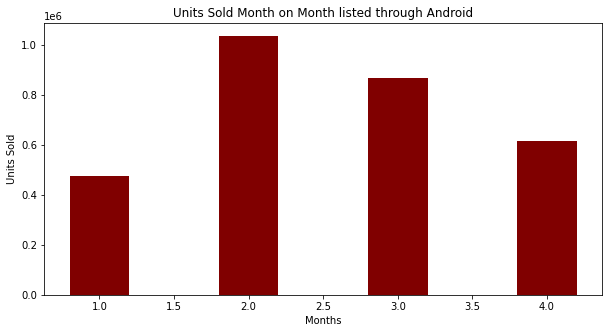

In [40]:
CDP_Android
Android_Monthly = CDP_Android.groupby(by = ["Order_month"])[["order_units"]].sum().add_prefix("_").reset_index()
print(Android_Monthly)
AMonths=Android_Monthly.Order_month
AUnits = Android_Monthly._order_units
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(AMonths, AUnits, color ='maroon',width = 0.4)
plt.xlabel("Months")
plt.ylabel("Units Sold")
plt.title("Units Sold Month on Month listed through Android")
plt.show()

### Calculating the total numbers of units orderd day wise for product listed through "Google
Data has been grouped by the sum of units ordered and date of order

1. Trend has been observed that Large orders are placed during 1st & 3rd week of the month
2. Top 10 dates when maximum units were ordered are:
        2020-03-06	199606
        2020-02-05	180326
        2020-02-17	150311
        2020-04-08	115322
        2020-03-05	113900
        2020-02-18	104490
        2020-02-04	98123
        2020-01-20	88763
        2020-04-07	84995
        2020-02-16	82014

    Order_Date  _order_units
0   2020-01-12          5000
1   2020-01-13         31501
2   2020-01-14         27100
3   2020-01-15         17000
4   2020-01-16          5389
..         ...           ...
100 2020-04-26          9400
101 2020-04-27          2000
102 2020-04-28           500
103 2020-04-29           250
104 2020-04-30         11850

[105 rows x 2 columns]


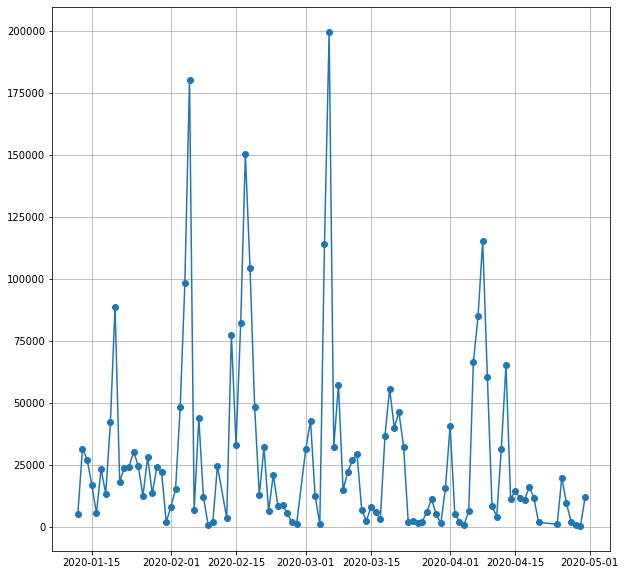

In [41]:
Android_Daily = CDP_Android.groupby(by = ["Order_Date"])[["order_units"]].sum().add_prefix("_").reset_index()
print(Android_Daily)
Adate = Android_Daily.Order_Date
AUnits = Android_Daily._order_units
plt.figure(figsize=(10,10))
plt.plot(Adate,AUnits, marker="o")
plt.grid(True)
plt.show()


In [42]:
Top_10_dates = Android_Daily.sort_values(by = "_order_units", ascending=False).head(10)
Top_10_dates

,Order_Date,_order_units
52,2020-03-06,199606
24,2020-02-05,180326
35,2020-02-17,150311
85,2020-04-08,115322
51,2020-03-05,113900
36,2020-02-18,104490
23,2020-02-04,98123
8,2020-01-20,88763
84,2020-04-07,84995
34,2020-02-16,82014


### Average Daily order quantity per product
Data has been grouped by average of units ordered, order date & prodcut id

1. Products with the highest average for daily quantity orders are (descending order):
            LS921223WU		25000.000000
            ID653642XA		20000.000000
            LS921223WU		17347.222222
            SX293820TT		17250.000000
            SW634274RD		14512.500000
            FN134089FJ		14500.000000
            LS921223WU		14500.000000
            XW931690DK		13500.000000
            LS921223WU		12250.000000
            FN134089FJ		11625.000000

In [43]:
Android_Daily_PP = CDP_Android.groupby(by = ["product_id","Order_Date"])[["order_units"]].mean().add_prefix("_")
Android_Daily_PP.to_excel("Android.xlsx")
Android_Daily_PP.sort_values(by = ['_order_units'], ascending=False).head(10)

,,_order_units
product_id,Order_Date,
LS921223WU,2020-03-05,25000.000000
ID653642XA,2020-03-22,20000.000000
LS921223WU,2020-02-05,17347.222222
SX293820TT,2020-03-18,17250.000000
SW634274RD,2020-04-12,14512.500000
FN134089FJ,2020-01-30,14500.000000
LS921223WU,2020-02-23,14500.000000
XW931690DK,2020-04-01,13500.000000
LS921223WU,2020-02-11,12250.000000


### Number of new products onboared daily, weekly & monthly through Android
1. Total of 528 products were launched through Android
2. On date 2020-04-10, 2020-04-11 & 2020-01-29 maximum of 11 products were added through this channel
3. On average 5 prodcuts are added daily through google over the website
4. Week 11 had the most number of products added i.e 40 & week 18 had the addition of 11 products only
5. 4th Month had the maxium addition of 140 products through google,followed by 3rd, 2nd & 1st months.

    product_launch_date  _Produc_id
0            2020-01-02           1
1            2020-01-03           4
2            2020-01-04           1
3            2020-01-05           7
4            2020-01-06          10
..                  ...         ...
109          2020-04-25           6
110          2020-04-26           7
111          2020-04-27           3
112          2020-04-28           1
113          2020-04-29           7

[114 rows x 2 columns]
528
4.631578947368421


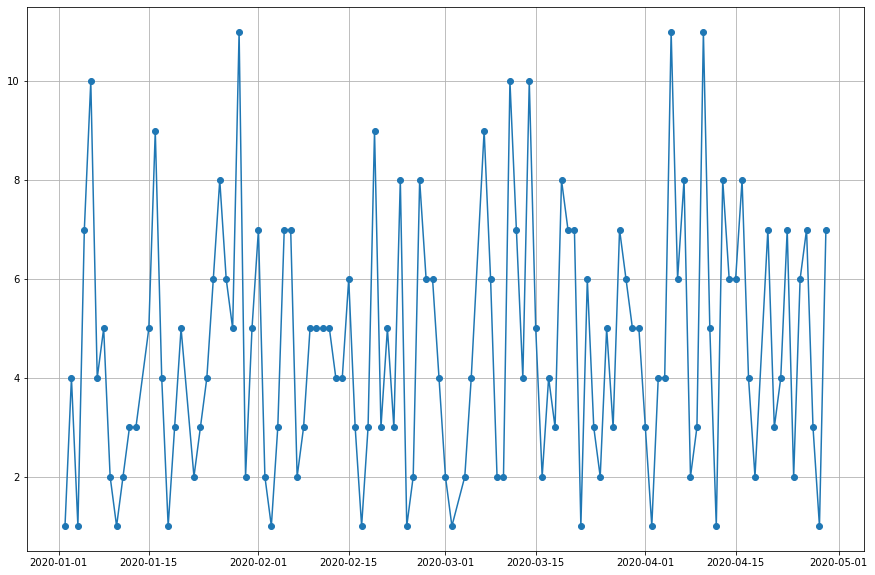

,product_launch_date,_Produc_id
95,2020-04-10,11
90,2020-04-05,11
25,2020-01-29,11
4,2020-01-06,10
68,2020-03-14,10
65,2020-03-11,10
13,2020-01-16,9
46,2020-02-19,9
61,2020-03-07,9
22,2020-01-26,8


In [44]:
Product_Data_android = Product_Data.loc[(Product_Data.Product_source=="android")&(Product_Data.Product_category=="platinum")]
Product_Data_android
Android_Daily_launch = Product_Data_android.groupby(by = ["product_launch_date"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Android_Daily_launch)
print(Android_Daily_launch._Produc_id.sum())
print(Android_Daily_launch._Produc_id.mean())
A_Launch_date= Android_Daily_launch.product_launch_date
A_Count = Android_Daily_launch._Produc_id

plt.figure(figsize=(15,10))
plt.plot(A_Launch_date,A_Count, marker="o")
plt.grid(True)
plt.show()


Android_Daily_launch = Product_Data_android.groupby(by = ["product_launch_date"])[["Produc_id"]].count().add_prefix("_").reset_index()
Android_Daily_launch.sort_values(by='_Produc_id',ascending=False).head(10)

    launch_week  _Produc_id
0             1          13
1             2          27
2             3          25
3             4          28
4             5          38
5             6          28
6             7          32
7             8          32
8             9          29
9            10          22
10           11          40
11           12          32
12           13          32
13           14          33
14           15          36
15           16          34
16           17          36
17           18          11


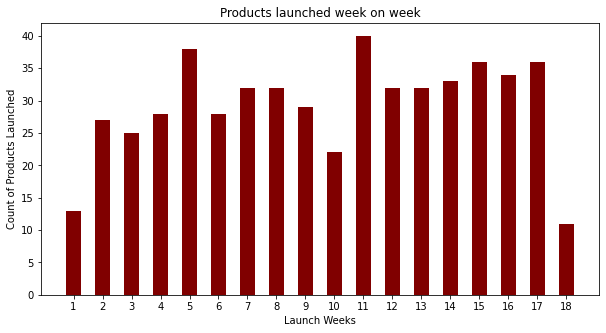

In [45]:
Android_weekly_launch = Product_Data_android.groupby(by = ["launch_week"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Android_weekly_launch)
A_Launch_week = Android_weekly_launch.launch_week
A_Product_id = Android_weekly_launch._Produc_id
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(A_Launch_week, A_Product_id, color ='maroon',width = 0.5)
plt.xlabel("Launch Weeks")
plt.ylabel("Count of Products Launched")
plt.title("Products launched week on week")
plt.xticks(np.arange(min(A_Launch_week), max(A_Launch_week)+1, 1.0))
plt.show()

   launch_month  _Produc_id
0             1         122
1             2         128
2             3         138
3             4         140


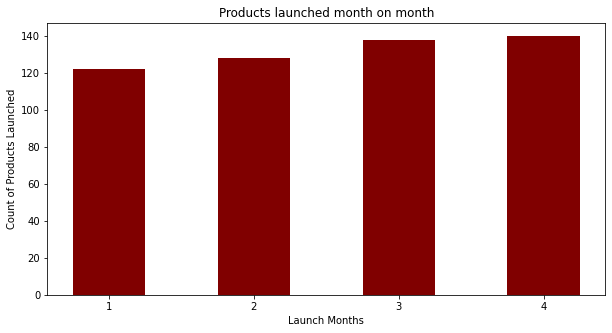

In [46]:
Android_monthly_launch = Product_Data_android.groupby(by = ["launch_month"])[["Produc_id"]].count().add_prefix("_").reset_index()
print(Android_monthly_launch)
A_monthly_launch = Android_monthly_launch.launch_month
A_monthly_count = Android_monthly_launch._Produc_id
fig,ax = plt.subplots(figsize = (10, 5))
 
# creating the bar plot
plt.bar(A_monthly_launch, A_monthly_count, color ='maroon',width = 0.5)
plt.xlabel("Launch Months")
plt.ylabel("Count of Products Launched")
plt.title("Products launched month on month")
plt.xticks(np.arange(min(A_monthly_launch), max(A_monthly_launch)+1, 1.0))

plt.show()

### Calcuting sales of new products sold month on month: Android

1. Total count of products listed through android is 528 and only 63 have been ordered since they have been launched, therefore the conversion rate is 7.64%.
2. This has been observed that products are sold more in the months they are introduced and it reduces in the following months, out of 63 only 14 products have been re-orded in the different months & 49 have not been ordered other then the month in which they were launched. %age of products not-repeated which were launched: 78% drop in retention
3. Top 3 products who has perfomed the best after the launch are: ID653642XA, LS921223WU,CZ304718PA
4. Total units ordered which are introduced through google are: 2993184

In [47]:
Android_sold = CDP_Android.groupby(by=['product_id','launch_month','Order_month'])[['order_units']].sum()
Android_sold = Android_sold.sort_values(by=['launch_month','order_units'], ascending=True)
Android_sold.to_excel("Android_sold.xlsx")
Android_sold

order_units
product_id launch_month Order_month             
JN348050FC 1            1                    100
                        2                    100
BG676972NO 1            1                    500
PE884671PE 1            1                    500
IR486845HU 1            1                   1000
...                                          ...
NT271274BM 4            4                  19890
HR386236PK 4            4                  23700
SE684096GG 4            4                  44622
FG516441KM 4            4                  62510
SW634274RD 4            4                 334092

[79 rows x 1 columns]